# TRAINING : LOGISTIC REGRESSION

In [ ]:
df_train_model = df_train_final[top_features]
df_train_model

,BUREAU_AVG_DAYS_CREDIT,EXT_SOURCE_1,AGE_YEARS,CREDIT_GOODS_DIFF,IP_COUNT_LATE,DAYS_EMPLOYED,PCB_BALANCE_RATIO,DAYS_LAST_PHONE_CHANGE,PCB_COUNT_ACTIVE,ACTIVE_CREDIT_COUNT,...,WEEKDAY_APPR_PROCESS_START_THURSDAY,ORGANIZATION_TYPE_Trade_type_7,EMERGENCYSTATE_MODE_Yes,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_School,EXT_SOURCE_3_NA,ORGANIZATION_TYPE_Kindergarten,NAME_HOUSING_TYPE_Municipal_apartment,SK_ID_CURR,TARGET
0,-874.000000,0.083037,25.902806,-326299.5,0.000000,-637,0.625000,1134.0,19.0,2.0,...,0,0,0,0,0,0,0,0,100002,1
1,-1400.750000,0.311267,45.900068,-1093801.5,0.000000,-1188,0.544643,828.0,26.0,1.0,...,0,0,0,0,1,1,0,0,100003,0
2,-867.000000,0.505998,52.145106,-128250.0,0.000000,-225,0.562500,815.0,3.0,0.0,...,0,0,0,0,0,0,0,0,100004,0
3,0.000000,0.505998,52.032854,-267313.5,0.000000,-3039,0.570833,617.0,18.0,0.0,...,0,0,0,0,0,1,0,0,100006,0
4,-1149.000000,0.505998,54.570842,-491134.5,0.242424,-3038,0.557561,1106.0,62.0,0.0,...,1,0,0,0,0,1,0,0,100007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.000000,0.145570,25.535934,-197442.0,0.000000,-236,0.546875,273.0,7.0,0.0,...,1,0,0,0,0,1,0,0,456251,0
307507,0.000000,0.505998,56.878850,-212998.5,0.166667,0,0.500000,0.0,6.0,0.0,...,0,0,0,0,0,1,0,0,456252,0
307508,-867.500000,0.744026,40.974675,-555021.0,0.071429,-7921,0.367647,1909.0,15.0,2.0,...,1,0,0,0,1,0,0,0,456253,0
307509,-1104.000000,0.505998,32.747433,-299295.0,0.000000,-4786,0.691071,322.0,20.0,0.0,...,0,0,0,0,0,0,0,0,456254,1


In [ ]:
# Pisahkan data untuk validasi

X = df_train_model.drop(columns=['SK_ID_CURR', 'TARGET'])
y = df_train_model['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membagi kolom berdasarkan kolom numerik dan kategorik
num_cols = "BUREAU_AVG_DAYS_CREDIT, AGE_YEARS, DAYS_EMPLOYED, DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH, DAYS_REGISTRATION, OWN_CAR_AGE, PA_RECENCY_MEAN, PA_DAYS_DECISION_RECENT, B_CURR_MIN_BB_MIN_BAL, B_CURR_MEAN_BB_MIN_BAL, BUREAU_TOTAL_DEBT, BUREAU_MAX_OVERDUE, PA_DOWN_PAYMENT_MEAN, PA_AMT_ANNUITY_MAX, PA_AMT_GOODS_PRICE_SUM, BUREAU_TOTAL_ANNUITY, BUREAU_MAX_DPD_CURRENT, BUREAU_MAX_DPD_CURRENT, BUREAU_MAX_OVERDUE, BUREAU_TOTAL_ANNUITY, BUREAU_QUERY_TOTAL, INCOME_PER_FAMILY, HOUR_APPR_PROCESS_START, IP_COUNT_INSTALMENT, BUREAU_AVG_DAYS_CREDIT, AGE_YEARS, CREDIT_GOODS_DIFF, DAYS_EMPLOYED, DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH, DAYS_REGISTRATION, PA_RECENCY_MEAN, PA_DAYS_DECISION_RECENT, OWN_CAR_AGE, CNT_CHILDREN, ACTIVE_CREDIT_COUNT, PA_COUNT_REFUSED, PCB_AVG_TENOR, IP_MAX_DPD, IP_AVG_DPD, BB_COUNT_RECENT_ACTIVE"
num_cols = list(set(num_cols.split(", ")))
cat_cols = X.drop(columns=num_cols, errors='ignore').columns.to_list()

In [ ]:
# Inisialisasi scaler
scaler = StandardScaler()

# Latih (Fit) scaler HANYA pada data train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] =  scaler.fit_transform(X_test[num_cols])

print("StandardScaler berhasil dilatih pada data train.")

StandardScaler berhasil dilatih pada data train.


In [ ]:
# Inisialisasi Model Regresi Logistik

model_lr = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

print("Memulai pelatihan model...")

# Latih model menggunakan data train
model_lr.fit(X_train, y_train)

print("Pelatihan selesai.")

Memulai pelatihan model...
Pelatihan selesai.


In [ ]:
# Prediksi Probabilitas
y_pred_proba = model_lr.predict_proba(X_test)[:, 1]

# Hitung Metrik Evaluasi Kunci
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Skor AUC-ROC: {auc_score:.4f}")
y_pred = (y_pred_proba >= 0.5).astype(int)

# 4. Hitung Recall
recall = recall_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

print("Nilai recall : ", recall)
print("Nilai akurasi : ", accuracy)

Skor AUC-ROC: 0.7321
Nilai recall :  0.674479692867246
Nilai akurasi :  0.6621465619563274


# TRAINING : XGBoost

In [ ]:
X = df_train_model.drop(columns=['SK_ID_CURR', 'TARGET'])
y = df_train_model['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Pemodelan menggunakan XGBoost
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    n_estimators=1500,
    learning_rate=0.02,
    max_depth=4,
    colsample_bytree = 0.97,
    gamma = 0.1,
    subsample= 0.85,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

print("\nMemulai pelatihan XGBoost...")
# Melatih model dengan Early Stopping
model_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)
print("Pelatihan XGBoost selesai.")


Memulai pelatihan XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:09:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pelatihan XGBoost selesai.


In [ ]:
# Prediksi kelas secara langsung (menggunakan threshold default 0.5)
y_pred = model_xgb.predict(X_test)

# Prediksi Probabilitas pada Data Test
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Hitung AUC-ROC
auc_score_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"\n AUC-ROC Score XGBoost: {auc_score_xgb:.4f}")

# Hitung Recall
recall = recall_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n AUC-ROC Score XGBoost: {auc_score_xgb:.4f}")
print(f"\n Accuracy: {accuracy:.4f}")
print(f"\n Recall: {recall:.4f}")


 AUC-ROC Score XGBoost: 0.7601

 AUC-ROC Score XGBoost: 0.7601
Accuracy: 0.7120
Recall Baru: 0.6674


# TRAINING : RANDOM FOREST

In [ ]:

# Inisialisasi Model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print("Memulai pelatihan Random Forest...")
# Latih model
rf_model.fit(X_train, y_train)
print("Pelatihan selesai.")

Memulai pelatihan Random Forest...
Pelatihan selesai.


In [ ]:
# Prediksi Probabilitas pada Data Test
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Nilai prediksi absolut
y_pred = rf_model.predict(X_test)

# Hitung Recall
recall = recall_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

# Hitung AUC-ROC Score
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\n AUC-ROC Score Random Forest: {auc_score_rf:.4f}")
print(f"\n Accuracy: {accuracy:.4f}")
print(f"\n Recall: {recall:.4f}")


 AUC-ROC Score Random Forest: 0.7270

 Accuracy: 0.7236

 Recall: 0.5910


# TRAINING : LIGHT GBM

In [ ]:
# Hitung bobot untuk kelas minoritas (TARGET=1)
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight = neg_count / pos_count

print(f"Scale Pos Weight (Bobot Kelas 1): {scale_pos_weight:.2f}")

Scale Pos Weight (Bobot Kelas 1): 11.38


In [ ]:
# Menentukan Parameter Model (Untuk klasifikasi biner)
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'n_estimators': 500,
    'learning_rate': 0.03,
    'num_leaves': 31,
    'max_depth': 7,
    'scale_pos_weight': scale_pos_weight,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'verbose': -1,
    'n_jobs': -1,
    'seed': 42
}

print("\nMemulai pelatihan LightGBM...")

# Pelatihan Model dengan Early Stopping
lgbm_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_test],
    callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
)

print("Pelatihan LightGBM selesai.")


Memulai pelatihan LightGBM...
Pelatihan LightGBM selesai.


In [ ]:
# Prediksi Probabilitas pada Data Test
y_pred_proba_lgbm = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)

# Hitung AUC-ROC
auc_score_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)

# Nilai absolut prediksi
y_pred = (y_pred_proba_lgbm >= 0.5).astype(int)

# Hitung recall
recall = recall_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

# Hitung AUC-ROC Score
auc_score_rf = roc_auc_score(y_test, y_pred_proba_lgbm)

print(f"\n AUC-ROC Score LightGBM: {auc_score_lgbm:.4f}")
print(f"\n Accuracy: {accuracy:.4f}")
print(f"\n Recall: {recall:.4f}")


 AUC-ROC Score LightGBM: 0.7482

 Accuracy: 0.6782

 Recall: 0.6937


# FEATURES IMPORTANCE FINAL

In [ ]:
# Membuat importances score untuk model xgb
importance_scores = model_xgb.feature_importances_
feature_names = model_xgb.get_booster().feature_names
feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_scores
    })

# Urutkan dan Tampilkan Top 20 Fitur teratas
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)
feature_importance_df

,Feature,Importance
29,NAME_EDUCATION_TYPE_Higher_education,0.060848
30,REGION_RATING_CLIENT_W_CITY,0.036180
47,NAME_INCOME_TYPE_Working,0.035290
35,CODE_GENDER_F,0.027832
0,BUREAU_AVG_DAYS_CREDIT,0.027774
4,IP_COUNT_LATE,0.024978
67,CODE_GENDER_M,0.024858
1,EXT_SOURCE_1,0.022315
17,PA_COUNT_REFUSED,0.021672
44,FLAG_DOCUMENT_3,0.019422


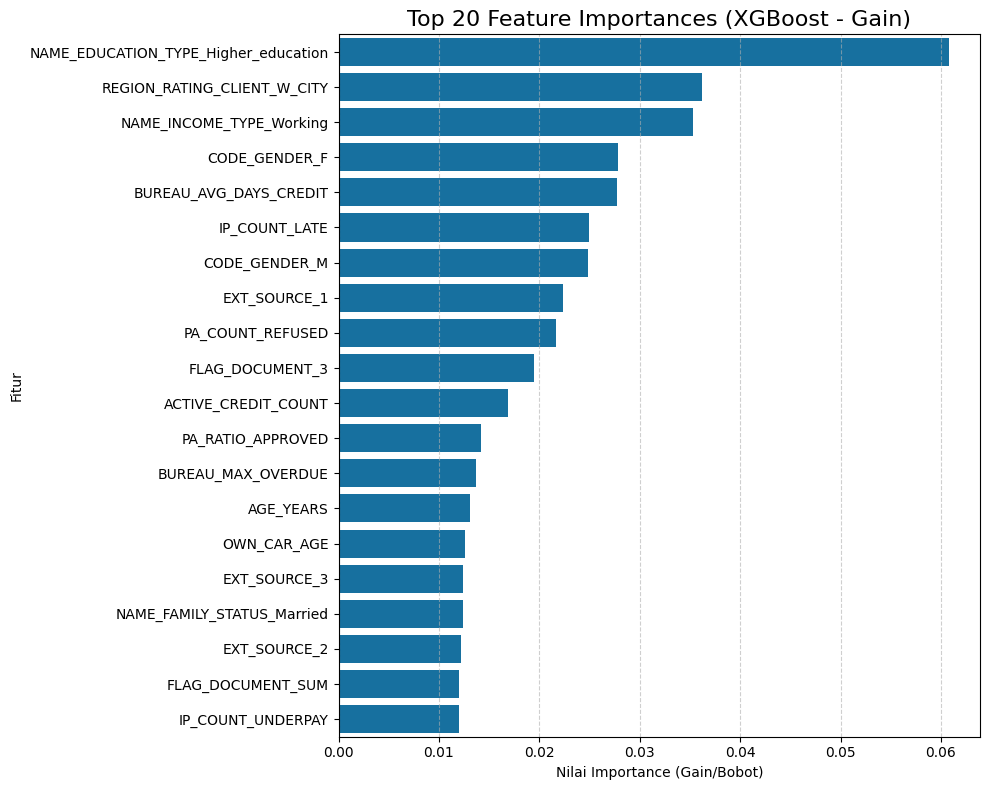

In [ ]:
# Membuat Bar Plot Horizontal
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.sort_values(by='Importance', ascending=False),
    color='#0077b6'
)
plt.title('Top 20 Feature Importances (XGBoost - Gain)', fontsize=16)
plt.xlabel('Nilai Importance (Gain/Bobot)')
plt.ylabel('Fitur')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()